# AI Programming with Python Nanodegree
## Matplotlib And Seaborn
----

## Tidy Data

Tidy data는 테이블 형식의 데이터 세트이다.
- 각 변수는 column이 된다. 
- 각 관찰한 결과 값이 row가 된다.
- 각 관측 유닛의 타입이다.

![mat1.png](./images/mat1.png)
![mat2.png](./images/mat2.png)
![mat3.png](./images/mat3.png)

테이블로 표현되었다 하더라도, tidy한 Data가 아닐 수 있다.
![mat4.png](./images/mat4.png)

따라서 먼저 Tidy Data를 만드는 것이 중요하다.

## Bar Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv("./pokemon.csv")
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


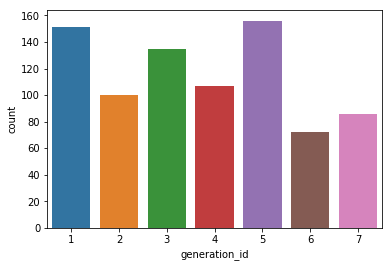

In [3]:
sb.countplot(data=pokemon, x="generation_id") #countplot으로 막대형 그래프를 만들 수 있다.

In [4]:
sb.color_palette() #사용하는 색상 팔레트

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
base_color = sb.color_palette()[0] #하나의 색상으로 통일해 줄 수도 있다.

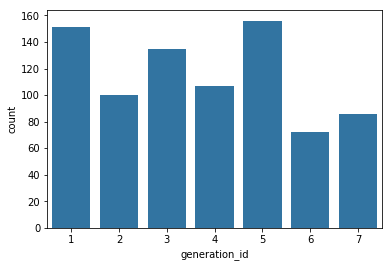

In [6]:
sb.countplot(data=pokemon, x="generation_id", color = base_color) #색상을 지정해 준다.

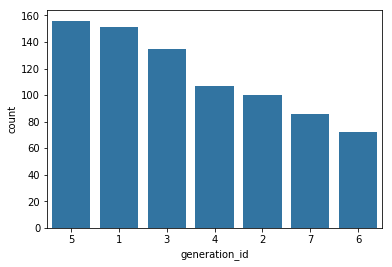

In [7]:
sb.countplot(data=pokemon, x="generation_id", color = base_color, order=[5, 1, 3, 4, 2, 7, 6]) #정렬해 준다.

In [8]:
pokemon["generation_id"].value_counts() #각 값의 count를 출력. 자동으로 출력 된다.

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [9]:
gen_order = pokemon["generation_id"].value_counts().index #카운트가 많은 순서에서 index만 가져온다.
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

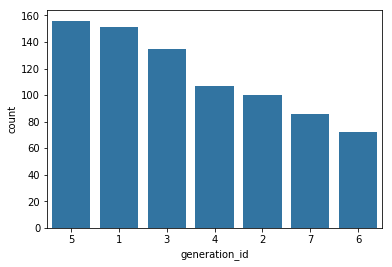

In [10]:
sb.countplot(data=pokemon, x="generation_id", color = base_color, order=gen_order) #정렬해 준다.

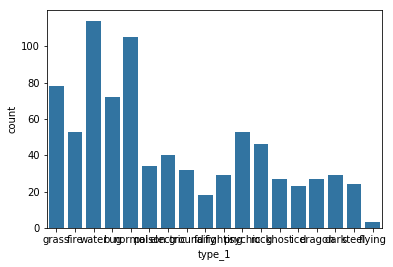

In [11]:
sb.countplot(data=pokemon, x="type_1", color = base_color) #카테고리가 너무 많은 경우 겹쳐서 읽기 힘들어진다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

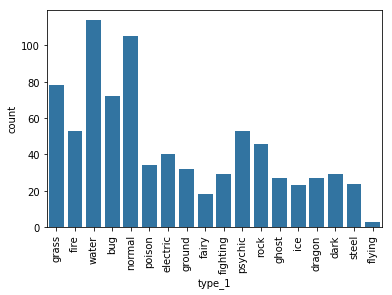

In [12]:
sb.countplot(data=pokemon, x="type_1", color = base_color)
plt.xticks(rotation = 90) #x 레이블을 90도 회전한다.

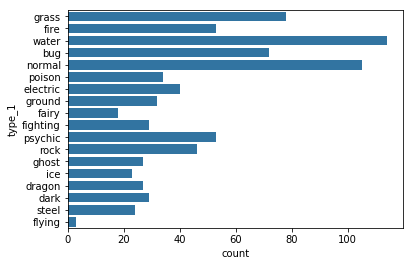

In [13]:
sb.countplot(data=pokemon, y="type_1", color = base_color) #아니면 막대 그래프의 방향 자체를 바꿀 수 있다.

In [14]:
type_order = pokemon["type_1"].value_counts().index

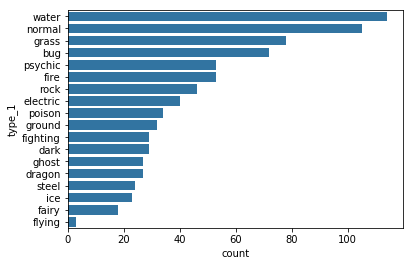

In [15]:
sb.countplot(data=pokemon, y="type_1", color = base_color, order=type_order)

In [16]:
# this method requires pandas v0.21 or later

# level_order = [5, 1]
# ordered_gen = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
# #CategoricalDtype로 범주형으로 만들 수 있다.
# pokemon['generation_id'] = pokemon['generation_id'].astype(ordered_gen)

## Absolute vs. Relative Frequency

In [17]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


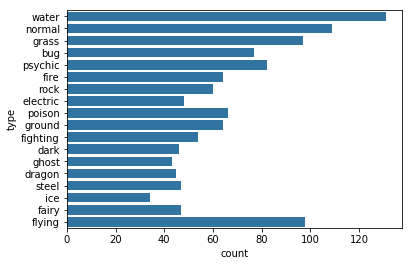

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [19]:
type_counts = pkmn_types['type'].value_counts() #각 타입의 수 카운트 #자동 정렬된다.
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [20]:
type_order = type_counts.index #정렬 순서

n_pokemon = pokemon.shape[0] #총 행의 수
max_type_count = type_counts[0] #가장 많은 타입의 수
max_prop = max_type_count / n_pokemon #가장 많은 타입의 퍼센트
print(max_prop)

0.1623296158612144


In [21]:
tick_props = np.arange(0, max_prop, 0.02) #0 ~ max_prop 까지 0.02 씩 증가 (레이블로 쓸 수 있다.)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [22]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props] #레이블 
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Text(0.5,0,'proportion')

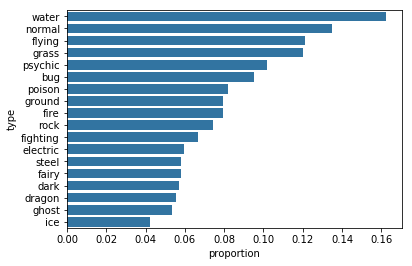

In [23]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names) #x 축을 상대적인 값으로 변경
plt.xlabel('proportion')

#xticks, yticks는 위치와 레이블을 수정할 수도 있다. 
#첫 번째 파라미터로 눈금의 위치를 지정해 준다. 두 번째 파라미터로 이름을 지정해 준다.

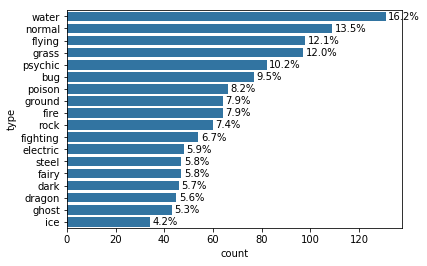

In [24]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]): #반복문으로 일일이 값을 넣어 줄 수도 있다.
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center') #텍스트로 주석을 달 수 있다.
    
#get_text() 메서드로 범주의 이름을 가져올 수 있다.

## Counting Missing Data

df.isna().sum() 를 이용해, DF에서 누락된(NaN) 데이터들을 가져올 수 있다.    
그 데이터를 활용해 막대 그래프를 생성할 수 도 있다.    
하나의 양적 변수에 대한 값을 나타낼 때에는 countplot 대신 barplot을 사용할 수 있다.

## Pie Charts

원형 차트(파이, 도넛)은 데이터가 2, 3개의 정도의 영역으로 나눠져 있을 때 사용하는 것이 좋다.    
너무 많은 카테고리를 파이 차트에 담으면 복잡해 진다. 이런 경우에는 기타 영역으로 묶어 활용한다.      
상대적인 값을 이용해야 하며, 12시 부터 시계 방향으로 가장 많은 카테고리를 배치하는 것이 좋다.    

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

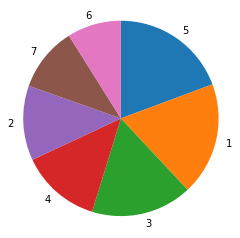

In [25]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False)
#startangle = 90이면 수직 위쪽 부터 시작한다.
#counterclock은 시계 역방향
plt.axis('square')

#위와 같이 파이 차트를 만들 수 있다.

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

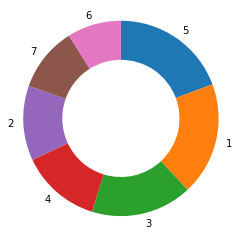

In [26]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4})
plt.axis('square')

#도넛 차트를 만들려면 pie 함수 호출에 "wedgeprops"인수를 추가하면 된다. 
#기본적으로 파이 (원)의 반지름은 1. wedges의 width 속성을 1보다 작게 설정하면 원 중심에서 채색이 제거된다.

## Histograms

히스토그램은 막대그래프와 비슷하지만, 각각의 값이 아닌 연속되는 값을 표현하기 적합하다.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

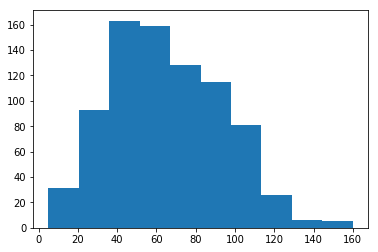

In [27]:
plt.hist(data=pokemon, x="speed") #default로 10개의 범위가 되도록 자른다.

#세미콜론을 마지막에 붙이면 그래프만, 안 붙이면 자료의 내용도 출력된다.

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

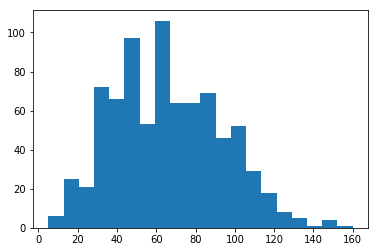

In [28]:
plt.hist(data=pokemon, x="speed", bins=20) #범위를 20개로 늘린다.

#describe()를 활용해 적절한 bins값을 계산해 볼 수 있다.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

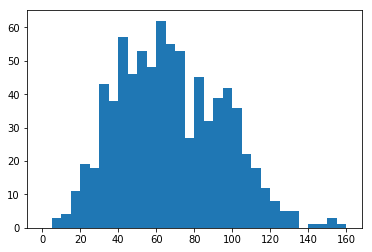

In [29]:
bins = np.arange(0, pokemon['speed'].max()+5, 5) #시작, 상한, step
#상한 값에도 최소한 +1을 해줘서, 마지막 step 사이에 최대값이 걸려 제대로 표현되지 않는 경우를 예방할 수 있다.

plt.hist(data=pokemon, x="speed", bins=bins) #범위를 최대값 사이의 범위와 step을 지정해 줄 수 있다.

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         1.,  0., 11.,  0.,  0.,  0.,  0., 13.,  0.,  1.,  4.,  1., 10.,
         0.,  1.,  4.,  3., 33.,  2.,  5.,  2.,  1., 26.,  6.,  2.,  3.,
         1., 36.,  2.,  8.,  8.,  3., 34.,  3.,  2.,  6.,  1., 45.,  3.,
         5.,  0.,  0., 29.,  4.,  4.,  8.,  3., 49.,  3.,  2.,  3.,  5.,
        40.,  4.,  4.,  6.,  1., 37.,  5.,  5.,  3.,  3., 15.,  3.,  3.,
         3.,  3., 33.,  3.,  1.,  4.,  4., 29.,  0.,  1.,  1.,  1., 29.,
         4.,  3.,  3.,  0., 27.,  2.,  7.,  3.,  3., 24.,  6.,  2.,  2.,
         2., 10.,  2.,  1.,  6.,  3., 11.,  2.,  3.,  1.,  1.,  8.,  2.,
         1.,  1.,  0.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  0.,  0.,  0.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15

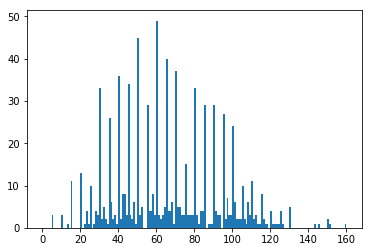

In [30]:
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins) #너무 작게 설정하면 구분하기 쉽지 않다.

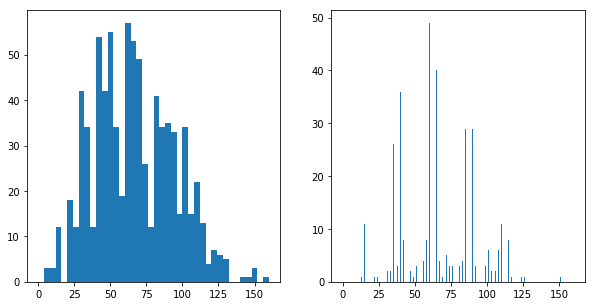

In [31]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

#subplot을 활용해서 여러 개의 plot을 보여 줄 수 있다. (행, 열, 위치 인덱스)

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


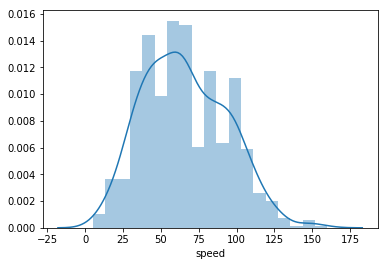

In [32]:
sb.distplot(pokemon['speed']) #plt 아닌 sb distplot 활용. 파라미터는 DF 아닌 배열 혹은 Series여야 한다.

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


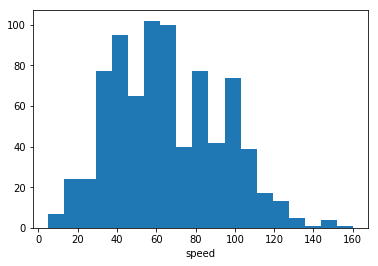

In [33]:
sb.distplot(pokemon['speed'], kde = False, hist_kws = {'alpha' : 1}) 
#KDE는 kernel density estimate http://darkpgmr.tistory.com/147
#hist_kws dict로 변경하는 설정도 있다.

## Choosing a Plot for Discrete Data

![mat5.png](./images/mat5.png)

위와 같이 엣지에 따라 다르게 해석될 여지가 있다. 히스토그램을 그릴 때는 항상 엣지의 범위와 크기를 염두에 둬야 한다.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

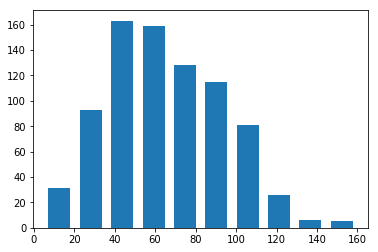

In [34]:
plt.hist(data = pokemon, x = 'speed', rwidth=0.7) #rwidth로 너비를 지정해 줄 수 있다.
#하지만 히스토그램의 특성상 사용하지 않는 것이 좋다.

## Descriptive Statistics, Outliers and Axis Limits

![mat6.png](./images/mat6.png)

(array([139., 252., 206., 126.,  42.,  10.,   7.,   7.,   3.,   2.,   3.,
          3.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <a list of 29 Patch objects>)

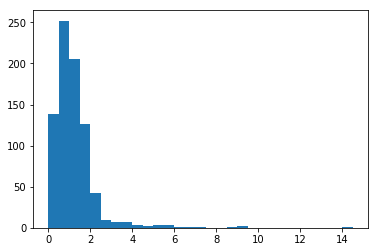

In [35]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins)

#매우 작은 값까지 모두 표시하므로 특이치가 있을 경우 그래프가 왜곡되어 보일 수 있다.

(0, 6)

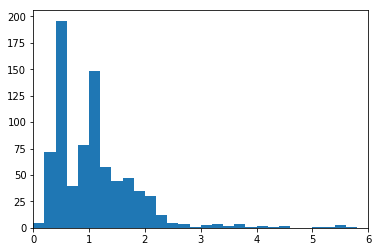

In [36]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2) #범주의 영역보 바꿔준다.
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0, 6)) #xlim으로 상한과 하한을 설정할 수 있다. 집중하는 영역을 정해 줄 수 있다. #축 제한

## Scales and Transformations

![mat7.png](./images/mat7.png)

(array([504., 130.,  67.,  32.,  13.,  22.,   8.,   6.,   9.,   2.,   3.,
          1.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   2.,   2.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000.]),
 <a list of 25 Patch objects>)

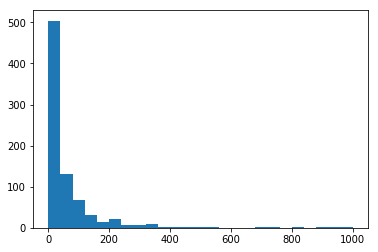

In [37]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)

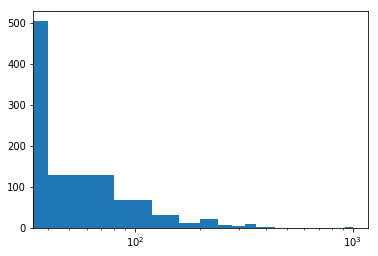

In [38]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale("log") #이전의 축 제한(xlim) 대신 축 변환(xscale)을 할 수 있다.
#x축의 범위를 10^N 기준으로 정한다.

In [39]:
print(pokemon['weight'].min(), pokemon['weight'].max()) #무게의 최소와 최대 값은 각 0.1 ~ 999.9 로 매우 범위가 넓다.

0.1 999.9


In [40]:
print(np.log10([pokemon['weight'].min(), pokemon['weight'].max()])) #로그를 적용해 변환해 줄 수 있다. 상용로그

[-1.          2.99995657]


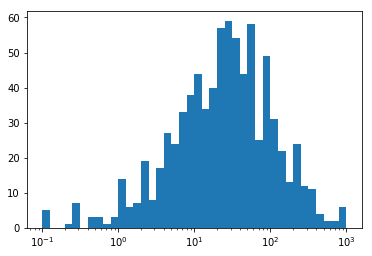

In [41]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')

([<matplotlib.axis.XTick at 0x1a229121d0>,
 <a list of 9 Text xticklabel objects>)

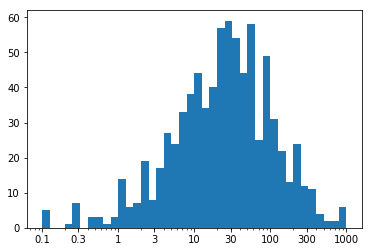

In [42]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000] #레이블을 변경해 준다.
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)

([<matplotlib.axis.XTick at 0x11b4c1710>,
 <a list of 5 Text xticklabel objects>)

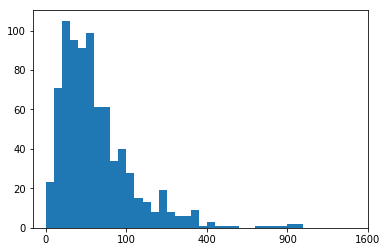

In [43]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

ln_data = pokemon['weight']

bin_edges = np.arange(0, sqrt_trans(ln_data.max())+1, 1)
plt.hist(ln_data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(ln_data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))

#apply로 직접 함수를 적용해 줄 수 있다. xscale에서 사용할 수 없는 다른 변환을 사용하는 경우 apply를 사용한다.

## Extra: Kernel Density Estimation

커널 밀도 추정은 변수의 확률 밀도 함수를 추정하는 방법이다.    
기본 설정은 정규 분포 커널을 사용하지만, 다른 커널 함수 옵션도 있다.

https://jayhey.github.io/novelty%20detection/2017/11/08/Novelty_detection_Kernel/

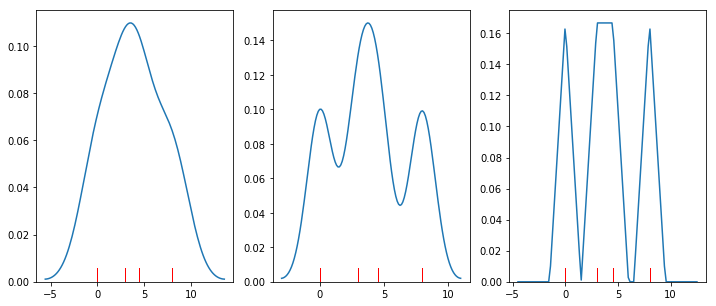

In [44]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

## Scatterplots and Correlation

![mat8.png](./images/mat8.png)

In [45]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0,0.5,'Combined Fuel Eff. (mpg)')

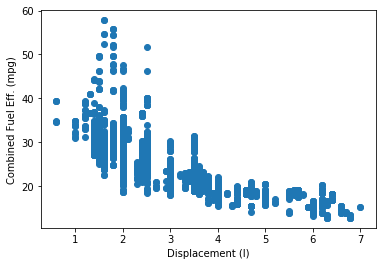

In [46]:
plt.scatter(data=fuel_econ, x="displ", y="comb") #산점도를 그린다. plt scatter
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

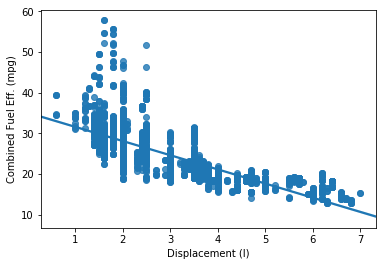

In [47]:
sb.regplot(data=fuel_econ, x="displ", y="comb") #산점도를 그린다. sb regplot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

#선형회귀의 음영 영역은 신뢰 영역을 보여준다.

Text(0,0.5,'Combined Fuel Eff. (mpg)')

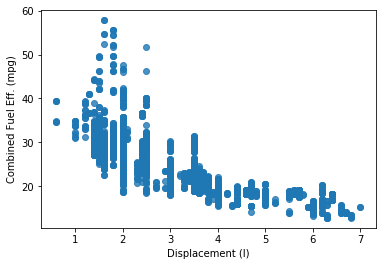

In [48]:
sb.regplot(data=fuel_econ, x="displ", y="comb", fit_reg=False) #산점도를 그린다. sb regplot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

#fit_reg=False로 선형 회귀 선의 여부를 설정해 줄 수 있다.

([<matplotlib.axis.YTick at 0x1a22c60160>,
 <a list of 6 Text yticklabel objects>)

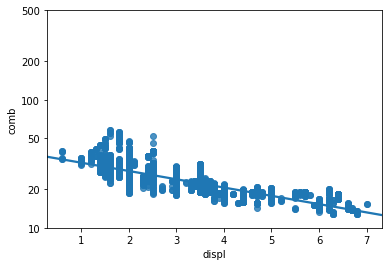

In [49]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

#데이터를 변환해 원하는 회귀선을 제대로 그릴 수 있다.

## Overplotting, Transparency, and Jitter

포인트가 너무 많거나 숫자 변수가 이산 값(T/F)인 경우, 산점도를 사용해서 유의미한 정보를 얻기 힘들다.     
중복되는 점들이 많으면 변수 간의 실제 관계를 보기 힘들기 때문에 Sampling, Transparency, Jitter등의 방법으로 해결해 줘야 한다.    

Transparency와 Jitter는 기본값에 영향을 미치지는 않는다.

(2012.5, 2018.5)

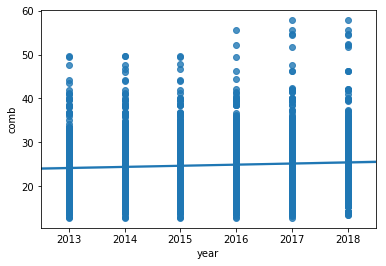

In [50]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb')
plt.xlim((2012.5, 2018.5))

#이 산점도의 경우, 데이터들의 관계가 상당히 불분명하다. 이런 경우, Transparency과 Jitter를 이용하는 것이 좋다.

(2012.5, 2018.5)

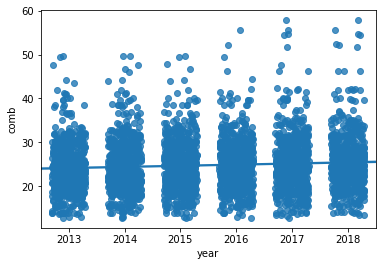

In [51]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3) #Jitter를 설정해 준다.
plt.xlim((2012.5, 2018.5))

#sb의 regplot에서만 jitter를 적용할 수 있으며, matplotlib의 scatter에서는 작동하지 않는다.
#jitter는 해당 축을 조절해서 데이터가 겹침을 해소한다. 한줄이 아닌 폭으로 나타난다. +- 0.3 범위로 그려진다.

(2012.5, 2018.5)

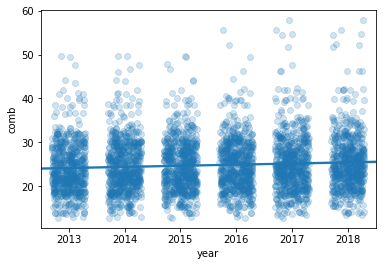

In [52]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/5}) #scatter_kws에서 alpha 추가
plt.xlim((2012.5, 2018.5))
#Transparency는 0(완전 투명, 보이지 않음)에서 1(완전 불투명, 보임) 사이의 값을 alpha에 추가하는 것이다.

(2012.5, 2018.5)

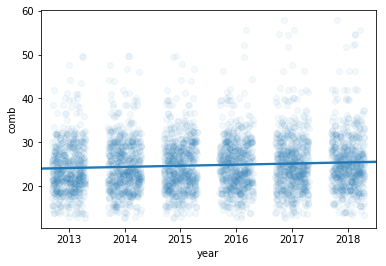

In [53]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/20})
plt.xlim((2012.5, 2018.5)) #좀더 명확해 진다.

#Transparency와 Jitter는 기본값에 영향을 미치지는 않는다.

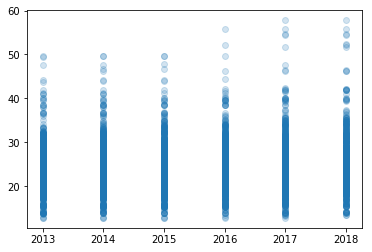

In [54]:
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha = 1/5) #plt에서는 alpha를 사용한다.

## Heat Maps

Text(0,0.5,'Combined Fuel Eff. (mpg)')

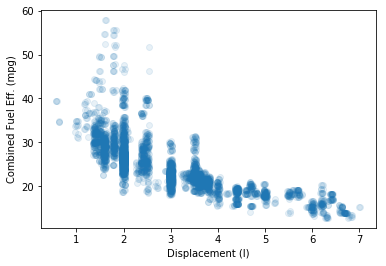

In [55]:
# previous scatter plot, with jitter and transparency
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter = 0.04,
           scatter_kws = {'alpha' : 1/10}, fit_reg = False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

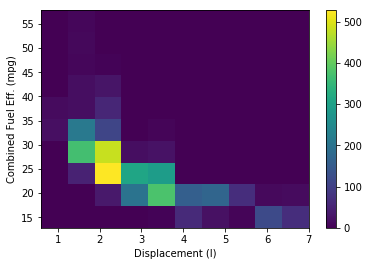

In [56]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb') #hist2d으로 히트맵을 구현한다.
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar() #컬러바 유무

#히트맵도 hist와 마찬가지로 10개의 bin이 기본값이다. 각 수는 하나의 색과 연관되어 있다.

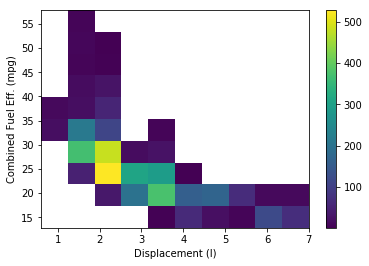

In [57]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5) #cmin 셀의 최소 값 설정 
#0.5 등으로 설정하면 1보다 작으므로 카운트가 없는 값은 채색되지 않는다.
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar();

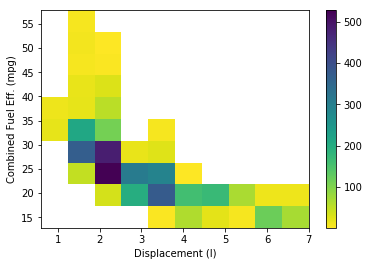

In [58]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, #cmap는 색상 팔레트를 변경한다.
           cmap = 'viridis_r') #viridis_r은 색을 역으로 적용한다. #흰색이 0이므로 반대로 되는 것이 좋다.
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar()

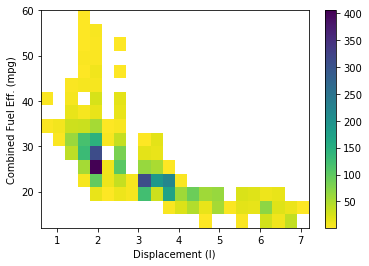

In [59]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]) #bin의 수를 설정해 줄 수 있다.
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar()

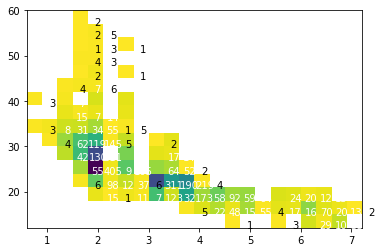

In [60]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
            
#text로 주석을 달아 줄 수 있다.

## Violin Plots

![mat9.png](./images/mat9.png)

커널 밀도 추정치로 값의 분포를 그린다.

In [61]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes) #카테고리로 만든다.
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

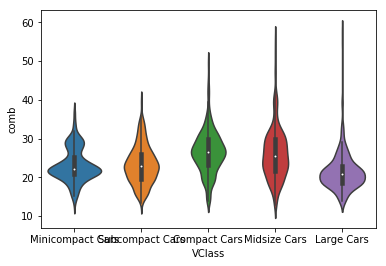

In [62]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

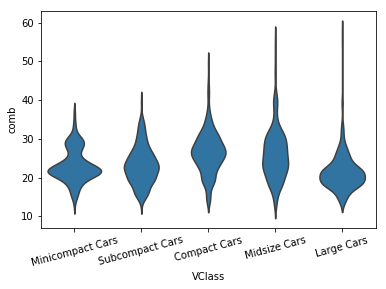

In [63]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = None) #inner = None으로 상자 plot을 제거할 수 있다.
plt.xticks(rotation = 15) #겹치는 부분을 회전시켜 준다.

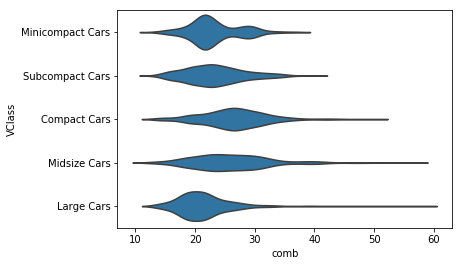

In [64]:
sb.violinplot(data = fuel_econ, x = 'comb', y = 'VClass',
              color = base_color, inner = None) #X, Y값을 반대로 주면 수평으로 된다.

## Box Plots

![mat10.png](./images/mat10.png)

사분위수 범위 (IQR, Q3-Q1)의 1.5배를 최대로 (Q3의 1.5), 반대로 Q1의 1.5를 최소로 한다.     
이 범위를 벗어나는 것을 이상치 점으로 표현한다.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

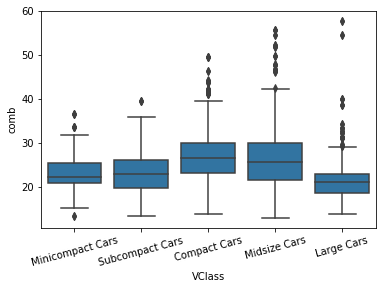

In [65]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color) #violinplot을 boxplot으로 바꿔주면 된다.
plt.xticks(rotation = 15)

(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text xticklabel objects>)

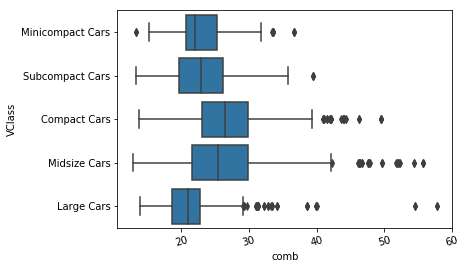

In [66]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'comb', y = 'VClass',
              color = base_color) #X, Y값을 반대로 주면 수평으로 된다.
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

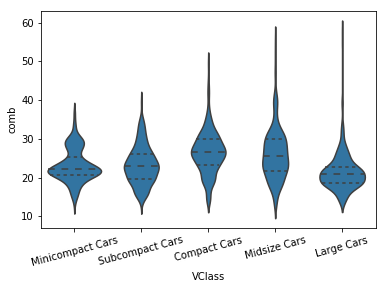

In [67]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile') #violinplot에서 상자 대신 quartile의 옵션을 줄 수도 있다.
plt.xticks(rotation = 15)

#quartile 옵션은 세 개의 중간 사분위 수에 대해 각 바이올린 영역에 세 줄을 그린다.

## Clustered Bar Charts

In [68]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0]) #새 컬럼을 만든다

#Automatic (AM6), Automatic (AM-S6) ...등의 trnas가 있는 데 이것을 split 해, Automatic과 Manual으로 나눈다.

In [69]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size() #그룹 바이로 묶어 수를 구한다.
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [70]:
ct_counts = ct_counts.reset_index(name = 'count') #count로 인덱스 재 지정
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [71]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count') #피벗으로 데이터 재 정렬
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


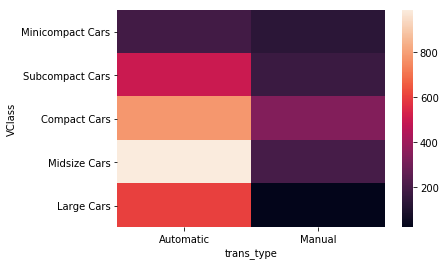

In [72]:
sb.heatmap(ct_counts)

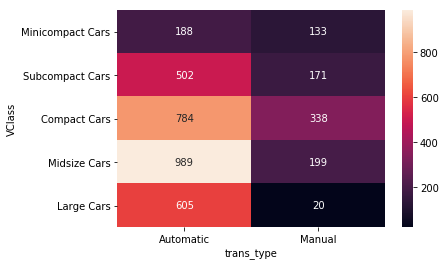

In [73]:
sb.heatmap(ct_counts, annot = True, fmt = 'd') #설명을 추가해 준다.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

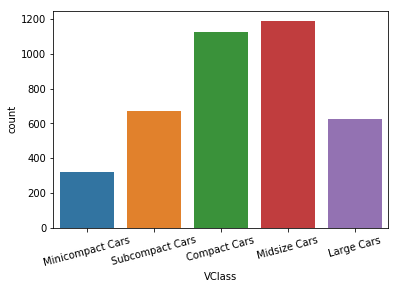

In [74]:
sb.countplot(data = fuel_econ, x = 'VClass') #하나의 변수에 대한, 막대 그래프 생성
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

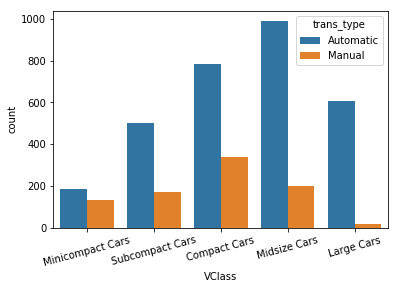

In [75]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type') #hue에 연관될 변수를 추가하면 연관된 막대 그래프를 생성한다.
plt.xticks(rotation = 15)

## Faceting

![mat11.png](./images/mat11.png)

패싯은 데이터를 분리된 하위 집합으로 나누며, 범주형 변수의 여러 수준으로 나눈다.     
데이터는 하위 세트 각각에 대해 동일한 플롯 유형이 다른 변수에 렌더링 된다.

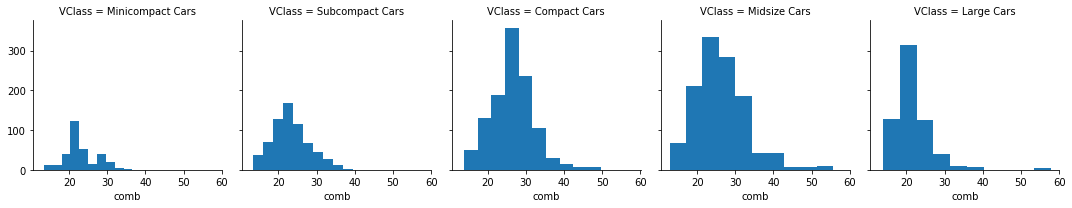

In [76]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass') #FacetGrid 인스턴스를 생성하고 패싯으로 지정할 카테고리를 지정한다.
g.map(plt.hist, 'comb') #map으로 하위 세트에 플롯될 유형 및 변수를 지정한다.

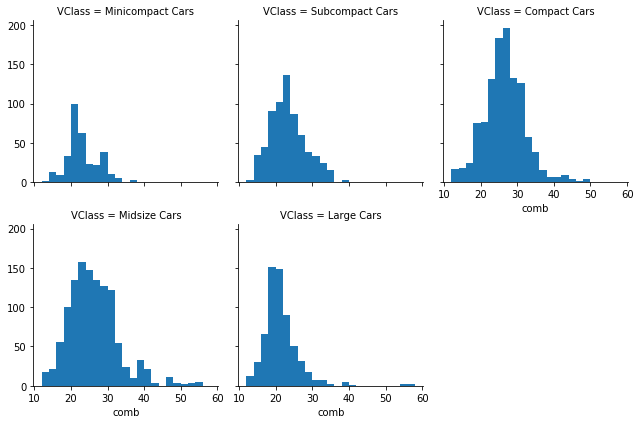

In [77]:
bins = np.arange(12, 58+2, 2) #bins 설정
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3) #col_wrap 가로 수
g.map(plt.hist, 'comb', bins = bins)

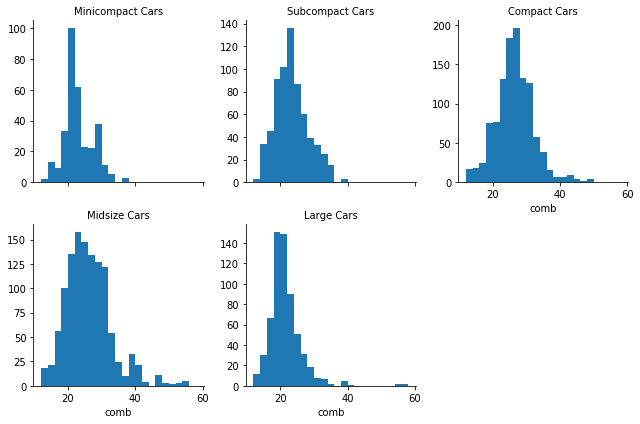

In [78]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey = False)
#sharey=False로 하면, 각 면에 자체 Y축 제한을 설정한다. 각 그래프에 대해 상세히 볼 수 있지만 전체 빈도를 놓치는 경우가 생길 수 있다.
#size는 각 패싯의 높이를 지정해 준다.
g.map(plt.hist, 'comb', bins = bins)
g.set_titles('{col_name}') #타이틀을 지정해 준다.

## Adaptation of Univariate Plots

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

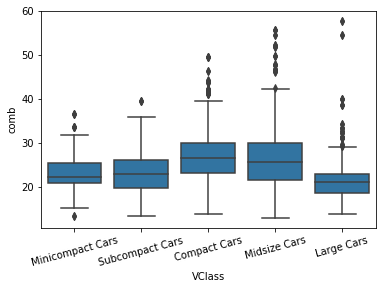

In [79]:
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
           color = base_color);
plt.xticks(rotation = 15)

Text(0,0.5,'Avg. combined efficiency (mpg)')

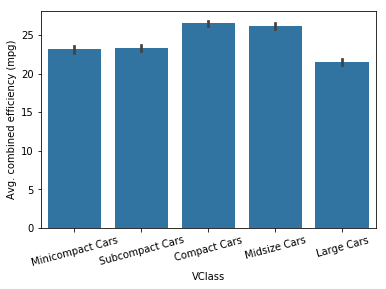

In [80]:
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color) #countplot이 아닌 barplot
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')
#barplot으로 평균을 나타내는 막대 그래프를 그려줄 수 있다.

Text(0,0.5,'Avg. combined efficiency (mpg)')

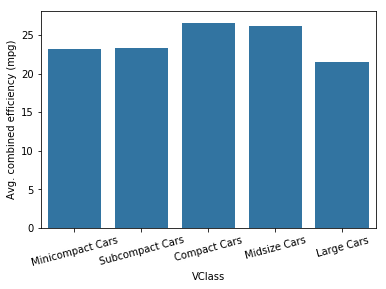

In [81]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, errwidth = 0)
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)')
#검은 구간은 신뢰구간의 불확실한 부분을 나타낸다. errwidth로 조절해 줄 수 있다.

Text(0,0.5,'Avg. combined efficiency (mpg)')

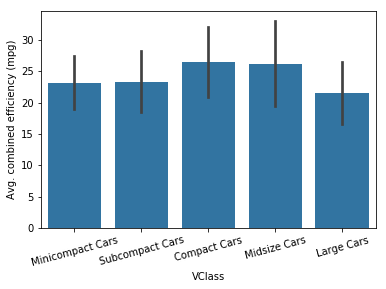

In [82]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, ci = 'sd') #ci = 'sd'로 표준 편차를 나타내는 막대그래프로 설정해 줄 수 있다.
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')

Text(0,0.5,'Avg. combined efficiency (mpg)')

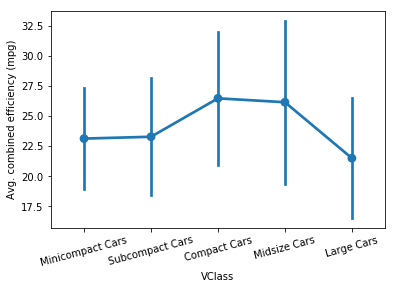

In [83]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
#0이하의 하한이 중요하지 않다면, barplot 대신 pointplot을 사용할 수 있다.
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')

Text(0,0.5,'Avg. combined efficiency (mpg)')

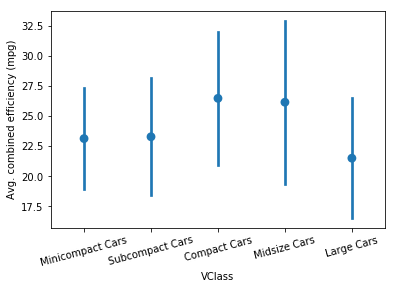

In [84]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = "")
#linestyles로 각 변수를 연결하는 선의 옵션을 바꿀 수 있다.
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')

## Line Plots

X 변수가 시간을 나타내는 경우의 선형 차트는 시계열 플롯이라 한다(주식, 환율..).    
시계열 데이터를 전문적으로 사용하는 sb의 tsplot이 있다(여기선 사용하지 않음

Alternate Variations 참고할 것.

Text(0,0.5,'Avg. combined efficiency (mpg)')

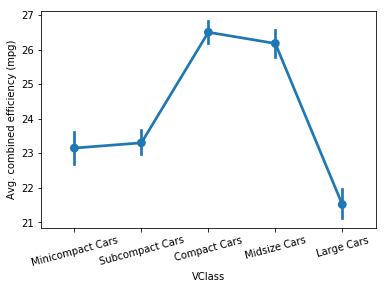

In [85]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb');
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined efficiency (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

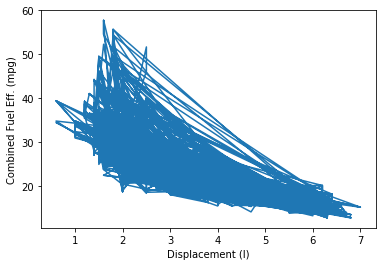

In [86]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
#이 경우에서 볼 수 있듯이, 시계열로 만들기 위한 적절한 데이터를 사용해야 한다.

In [87]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

#cut을 사용해, 각 데이터 포인트를 사용해야 하는 bins를 구한다.
#그 후, groupby로 해당 변위 bin에 따라 그룹화하고 각 그룹에 속하는 점의 평균을 구한다.

Text(0,0.5,'Mean Combined Fuel Eff. (mpg)')

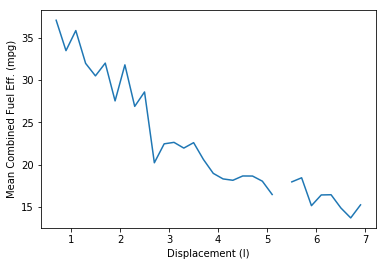

In [88]:
plt.errorbar(x = bins_c, y = comb_mean)
plt.xlabel('Displacement (l)')
plt.ylabel('Mean Combined Fuel Eff. (mpg)')

In [89]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

Text(0,0.5,'Mean Combined Fuel Eff. (mpg)')

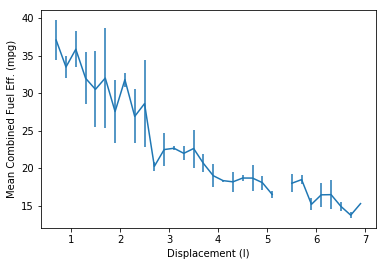

In [90]:
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std)
plt.xlabel('Displacement (l)')
plt.ylabel('Mean Combined Fuel Eff. (mpg)')

## Swarm Plots

![mat12.png](./images/mat12.png)

(6.966470319355816, 63.09321945242605)

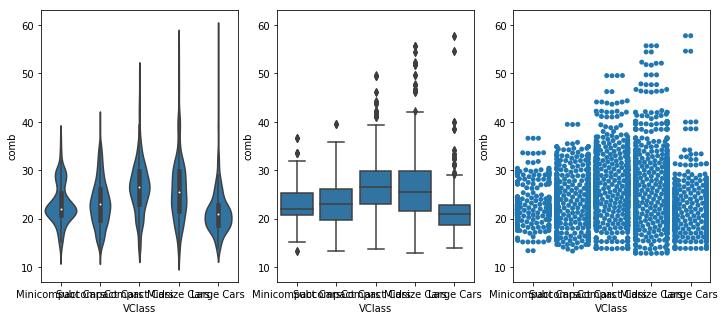

In [92]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

## Rug and Strip Plots

![mat13.png](./images/mat13.png)